### EE 421/521 Image Processing - Spring 2020-21

## Project 3 -  Two-Dimensional Filtering

#### Submission deadline: 15 March 2021

In this project, you will implement the following:

1. A 2D convolution
2. High-frequency boost filter
3. Horizontal edge detection filter
4. 135-degree edge detection filter
5. Unsharp-masking filter (long approach)
6. Unsharp-masking filter (direct approach)

**Note: This project will be graded for both EE 421 (HW2) and EE 521 (HW2) students.**

*Copyright (c) 2021 by Arif Tanju Erdem*

************************************
Neva Yaren Bulut
************************************

In [1]:
# STEP 0 Import the necessary packages

# reading/writing image files
from skimage import io
from skimage import color

# displaying images and plots
import matplotlib.pyplot as plt

# array operations
import numpy as np

# signal processing operations
from scipy import signal
from scipy.linalg import circulant

In [2]:
# function to round image data to nearest integer, truncate to range [0, 255], set data type to uint8

def my_imgTruncate(img):
    
    img = np.round(img, 0)
    img = np.minimum(img, 255)
    img = np.maximum(img, 0)
    img = img.astype('uint8')
    
    return img

In [3]:
# my function to convert to luminance, round to nearest integer, 
# truncate to range [0, 255], and then set data

def my_imgLuminance(imgRGB):
    
    # make sure it is a color image
    assert imgRGB.shape[2] == 3
    
    # get the luminance data
    imgLum = color.rgb2gray(imgRGB)

    imgLum = np.round(imgLum * 255, 0)
    imgLum = np.minimum(imgLum, 255)
    imgLum = np.maximum(imgLum, 0)
    imgLum = imgLum.astype('uint8')
    
    return imgLum

# end of function

In [4]:
# ===============================
# (1.a) Implement 2D convolution
# ===============================

# ADD YOUR CODE HERE

# calculate 2-D convolution

def my_filter2D(X, H):
    
    # X: 2D input image
    # H: 2D filter kernel
    
    # make sure both X and H are 2-D
    assert( X.ndim == 2)
    assert( H.ndim == 2)

    # get the horizontal and vertical size of X and H
    X_size_x = X.shape[1] #width
    X_size_y = X.shape[0] #height
    H_size_x = H.shape[1]
    H_size_y = H.shape[0]
    
    # calculate the horizontal and vertical size of Y (assume "full" convolution)
    Y_size_x = X_size_x + H_size_x - 1
    Y_size_y = X_size_y + H_size_y - 1
        
    # create an empty output array
    Y = np.zeros((Y_size_y,Y_size_x))

    # (i) go over output locations
    for m in range(Y_size_y):
        for n in range(Y_size_x):
        
        # (ii) go over input locations
            for i in range(X_size_y):
                for j in range(X_size_x):    
            # (iii) make sure the kernel is within bounds
                   if (m-i >= 0) and (m-i < H_size_y ) and (n-j >= 0) and (n-j < H_size_x):
                                
            # (iv) calculate the convolution sum
                       Y[m,n]+=X[i,j]*H[m-i,n-j] 
    
    return Y

# end of function


In [5]:
# ===============================
# (1.b) Test your 2-D convolution function
# ===============================

# a sample 2-D input
X = np.array([[2, 1, 2, 3, 0],
              [1, 3, 2, 1, 1],
              [2, 3, 0, 1, 2],
              [0, 1, 3, 2, 1]])

# a sample 2-D filter 
H = np.array([[2, 4, -2],
              [1, 2, -1]])

# call your function to calculate 2D convolution
Y_my = my_filter2D(X, H)

# print your output
print("My convolution: \n", Y_my)

# use SciPy function to calculate 2D convolution
Y_sp = signal.convolve2d(X, H, mode='full', boundary='fill', fillvalue=0)

# print SciPy output and compare it with yours
print("\nSciPy convolution: \n", Y_sp)

# print the error evaluates as sum squared difference
print("\nError: ", ((Y_my - Y_sp)*(Y_my - Y_sp)).sum())


My convolution: 
 [[ 4. 10.  4. 12.  8. -6.  0.]
 [ 4. 15. 16. 10.  6. -1. -2.]
 [ 5. 19. 15. -2.  9.  7. -5.]
 [ 2.  9. 14. 12.  8.  3. -4.]
 [ 0.  1.  5.  7.  2.  0. -1.]]

SciPy convolution: 
 [[ 4 10  4 12  8 -6  0]
 [ 4 15 16 10  6 -1 -2]
 [ 5 19 15 -2  9  7 -5]
 [ 2  9 14 12  8  3 -4]
 [ 0  1  5  7  2  0 -1]]

Error:  0.0


Image width is 512 and image height is 512.
Number of color bands is 3.
Image data type is uint8.



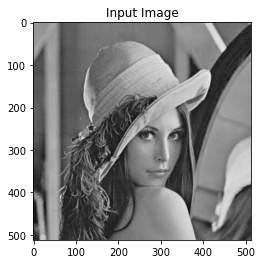

In [6]:
# STEP 2 Pick an image for filtering

# set image folder
image_folder = r'D:\yeni\Dersler\EE421-imageprocessing\images'

# read input image 
image_file = r'/lena.png'
image_path = image_folder + image_file
imgRGB = io.imread(image_path)

height = imgRGB.shape[0]
width = imgRGB.shape[1]
bands = imgRGB.shape[2]
datatype = imgRGB.dtype

print("Image width is {} and image height is {}.".format(width, height))
print("Number of color bands is {}.".format(bands))
print("Image data type is {}.\n".format(datatype))

# calculate the luminance image
img_input = my_imgLuminance(imgRGB)

# display luminance image
plt.imshow(img_input, cmap='gray', vmin=0, vmax=255)
plt.title('Input Image')
#plt.xticks([]), plt.yticks([])
plt.show()

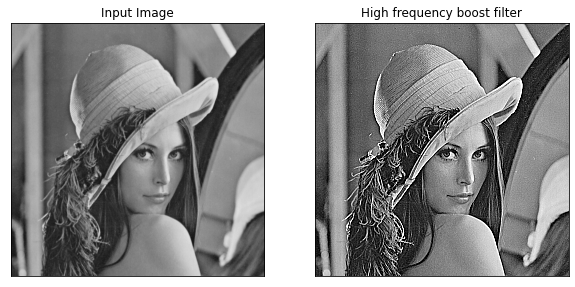

In [7]:
# =====================================================
# (2.1) Define a high-frequency boost filter and apply it on input image
# =====================================================

# ADD YOUR CODE HERE

# (i) define a high-frequency boost filter
my_filter=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]]) #coefficients must sum up to 1.

# (ii) apply the high-frequency boost filter on the input image
# use the signal.convolve2d() function for filtering
img_output = signal.convolve2d(img_input, my_filter, mode='same', boundary='symm')

# (iii) display the output image
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img_input, cmap = 'gray', vmin=0, vmax=255)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_output, cmap = 'gray', vmin=0, vmax=255)
plt.title('High frequency boost filter'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

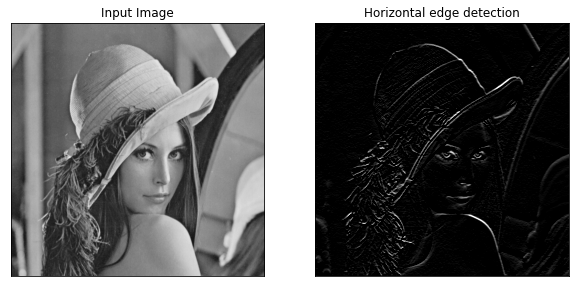

In [8]:
# ========================================================
# (2.2) Define a horizontal edge detection filter and apply it on input image
# ========================================================

# ADD YOUR CODE HERE

# (i) define a horizontal edge detection filter
my_filter=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
# (ii) apply the horizontal edge detection filter on the input image
# use the signal.convolve2d() function for filtering
img_output = signal.convolve2d(img_input, my_filter, mode='same', boundary='symm')
# (iii) display the output image
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img_input, cmap = 'gray', vmin=0, vmax=255)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_output, cmap = 'gray', vmin=0, vmax=255)
plt.title('Horizontal edge detection'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

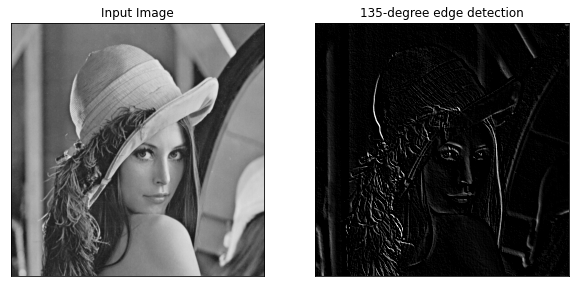

In [9]:
# ========================================================
# (2.3) Apply a 135-degree edge detection filter on input image
# ========================================================

# ADD YOUR CODE HERE

# (i) define a 135-degree edge detection filter
my_filter=np.array([[0,-1,-1],[1,0,-1],[1,1,0]])
# (ii) apply the 135-degree edge detection filter on the input image
# use the signal.convolve2d() function for filtering
img_output = signal.convolve2d(img_input, my_filter, mode='same', boundary='symm')
# (iii) display the output image
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img_input, cmap = 'gray', vmin=0, vmax=255)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_output, cmap = 'gray', vmin=0, vmax=255)
plt.title('135-degree edge detection'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

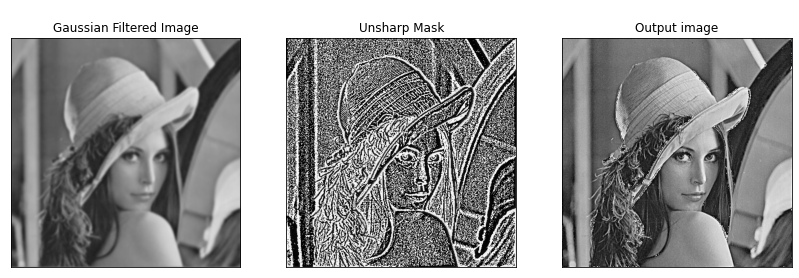

In [10]:
# ==========================================================================
# (3.1) Implement unsharp masking (long approach)
# ==========================================================================

# ADD YOUR CODE HERE
        
    # (i) define a Gaussian filter
def gauss():
    # filtering factor
    M = 5

    # standard deviation of Gaussian
    sigma = 0.425 * M

    # filter size
    size = np.round(2.55 * M, 0)
    size = size.astype(int)

    # for symmetric filter size should be odd
    if size%2 == 0:
        size -= 1

    # calculate Gaussian with the selected parameters
    my_filter = signal.gaussian(size, sigma, sym=True)
    # normalize sum to 1
    my_filter /= my_filter.sum()

    # obtain the separable 2D filter from the 1D filter
    my_filter2D = np.outer(my_filter, my_filter)
    # (ii) apply the Gaussian filter to obtain a blurred image
    # use the signal.convolve2d() function for filtering
    img_output_Gauss = signal.convolve2d(img_input, my_filter2D, mode='same', boundary='fill', fillvalue=128)
    img_output_Gauss = my_imgTruncate(img_output_Gauss)
    return img_output_Gauss

# (iii) calculate the sharpening image
unsharp_masking=img_input-gauss()
# (iv) calculate the output image using the blurred image and sharpening image
sharped_image=img_input+unsharp_masking
# (v) display the output image
plt.figure(figsize=(14,14))
plt.subplot(131),plt.imshow(gauss(), cmap='gray', vmin=0, vmax=255)
plt.title('\nGaussian Filtered Image')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(unsharp_masking, cmap='gray', vmin=0, vmax=255)
plt.title('\nUnsharp Mask')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(sharped_image, cmap='gray', vmin=0, vmax=255)
plt.title('\nOutput image')
plt.xticks([]), plt.yticks([])
plt.show()

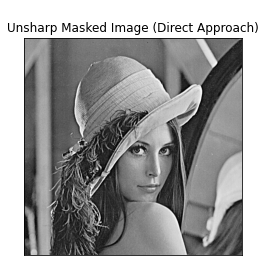

In [11]:
# ==========================================================================
# (3.2) Implement unsharp masking (direct approach)
# ==========================================================================

# ADD YOUR CODE HERE

# (i) define convolution mask

# filtering factor                                                 #I=identity matrix
M = 5                                                              #h gaussian filter
# standard deviation of Gaussian                                   #x*h
sigma = 0.425 * M                                                  #sharpening image x-x*h
# filter size                                                      #output image x+x-x*h
size = np.round(2.55 * M, 0)                                       #x*I+x*I-x*h = x* (2*I-h) //Distributivity
size = size.astype(int)
# for symmetric filter size should be odd
if size%2 == 0:
    size -= 1
my_filter = signal.gaussian(size, sigma, sym=True)
my_filter /= my_filter.sum()
my_filter2D = np.outer(my_filter, my_filter)

I= np.zeros((13,13)) #size of gaussian filter 13 

I[6,6] = 1

# (ii) calculate the output image
# use the signal.convolve2d() function for filtering

my_filter3 = I + I - my_filter2D
Out1 = signal.convolve2d(img_input, my_filter3, mode='same', boundary='symm')
Out1 = my_imgTruncate(Out1)
# (iii) display the output image

plt.imshow(Out1, cmap='gray', vmin=0, vmax=255)
plt.title('\nUnsharp Masked Image (Direct Approach)')
plt.xticks([]), plt.yticks([])
plt.show()


*STEP 4 Comments on the results*

*ADD YOUR COMMENTS HERE*

(a) Comment on the filtering results in 2.1, 2.2 and 2.3. Do the results look as expected?

Between 2.1,high boost filtering, and edge detections does not look same at all. 2.1 more sharper than 2.2 and 2.3. Between 2.2 and 2.3, 2.3 looks more sharper. Edges are more defined than 2.2 at different places.

(b) Comment on the filtering results of 3.1 and 3.2. Do they look the same and appear as enhanced?

Output image at 3.1 and 3.2 looks more enhanced than input image and they are similar.3.2 looks more smoother than 3.1.